# Section 1: Problem Statement

You were hired to figure out which customers would be willing to sign up to a savings account in a bank via direct marketing.

## Why does this matter?

### 1. Customer churn

Calling a customer who cannot sign up can lead for he/she to unsubscribe.

### 2. Opportunity cost

Sending a customer to the wrong product can create a loss (ie the customer unsubscribes)... all while the customer may be interested in another product.

### 3. Relevance

Continuously sending information that the customer is not interested in can potentially lead to lower willingness to sign up for future products.

## Benefits of XGBoost

### 1. Importance ranking

XGBoost figures out which drivers matter more.

### 2. Accuracy

XGBoost achieves better results than other ML algorithms like Logistic Regression or random forest.

### 3. Parallel Processing

You can set your computer to run the algorithm in your cores. Moreover, XGBoost is also faster than other techniques and can help you scale, analyze, and predict results much quicker.

## What is XGBoost?

- stands for Extreme Gradient Boosting
- can be constructed with a tree-based algorithm or linear (worse results)
- is an ensemble algorithm
- each new model is built upon a precedent one -> continuous improvement
- can be used for regression (dependent variable continuous) & classification (categorical)


## XGBoost quirks

- factors do not work with XGBoost: they must be transformed into dummy variables
- XGBoost treats NA's as information, unlike other regression models
- can deal with non-linear relationships between dep. and indep. vars.

# Section 2: Python Code

#### import libraries

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np

#### importing dataset

#### isolate the x and y variables

In [2]:
dataset = pd.read_csv("bank-full.csv", sep = ";")
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [3]:
y = dataset.iloc[:, -1].values
X = dataset._get_numeric_data()

#### split dataset into training and test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2,
                                                    random_state=1502)

In [5]:
y_train

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [6]:
y_test

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

#### transform y factor variables

In [7]:
y_train = np.where(y_train == "yes", 1, 0)
y_test = np.where(y_test == "yes", 1, 0)

In [8]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [9]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [10]:
np.mean(y_train)

0.11579296615792967

In [11]:
np.mean(y_test)

0.12175163109587527

#### create xgboost matrices

In [12]:
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

#### set the parameters

In [13]:
parameters1 = {'learning_rate': 0.3,
               'max_depth': 2,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#### run XGBoost

In [14]:
model1 = xgb.train(params = parameters1,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.73930
[50]	Yes-auc:0.87648
[100]	Yes-auc:0.87997
[150]	Yes-auc:0.88189
[199]	Yes-auc:0.88308


#### predictions

In [15]:
predictions1 = model1.predict(Test)
predictions1 = np.where(predictions1 > 0.5, 1, 0)

#### confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix1 = confusion_matrix(y_test, predictions1)
print(confusion_matrix1)

[[7698  244]
 [ 746  355]]


In [17]:
report1 = classification_report(y_test, predictions1)
print(report1)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7942
           1       0.59      0.32      0.42      1101

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



# Section 3

#### isolate the categorical variables

In [18]:
dataset_categorical = dataset.select_dtypes(exclude = "number")
dataset_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


#### tranform categorical variables into dummy variables

In [19]:
dataset_categorical = pd.get_dummies(data = dataset_categorical,
                                     drop_first = True)
dataset_categorical

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


#### joining numerical and categorical datasets

In [20]:
final_dataset = pd.concat([X, dataset_categorical], axis = 1)
final_dataset

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


#### getting names of columns

In [21]:
feature_columns = list(final_dataset.columns.values)
feature_columns = feature_columns[:-1]

# Section 4

#### isolate the x and y variables part 2

In [22]:
y = final_dataset.iloc[:, -1].values
X = final_dataset.iloc[:, :-1].values

#### split dataset into training and test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2,
                                                    random_state=1502)

#### create xgboost matrices part 2

In [24]:
Train = xgb.DMatrix(X_train, label = y_train, feature_names = feature_columns)
Test = xgb.DMatrix(X_test, label = y_test, feature_names = feature_columns)

#### set the parameters part 2

In [25]:
parameters2 = {'learning_rate': 0.3,
               'max_depth': 2,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#### run XGBoost

In [26]:
model2 = xgb.train(params = parameters2,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.73159
[50]	Yes-auc:0.91883
[100]	Yes-auc:0.92524
[150]	Yes-auc:0.92744
[199]	Yes-auc:0.92748


#### Predictions part 2

In [27]:
predictions2 = model2.predict(Test)
predictions2 = np.where(predictions2 > 0.5, 1, 0)

#### Confusion MAtrix

In [28]:
confusion_matrix2 = confusion_matrix(y_test, predictions2)
print(confusion_matrix2)

[[7662  280]
 [ 629  472]]


In [29]:
report2 = classification_report(y_test, predictions2)
print(report2)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7942
           1       0.63      0.43      0.51      1101

    accuracy                           0.90      9043
   macro avg       0.78      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043



# Section 5

#### checking how many cores we have

In [30]:
import multiprocessing
multiprocessing.cpu_count()

8

#### setting the cross validation parameters

In [31]:
from sklearn.model_selection import KFold
tune_control = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 1502).split(X = X_train,
                                                y = y_train)

#### set parameter tuning
#### set the parameters part 2

In [32]:
tune_grid = {'learning_rate': [0.05, 0.3],
               'max_depth': range(2, 9, 2),
               'colsample_bytree': [0.5, 1],
               'subsample': [1],
               'min_child_weight': [1],
               'gamma': [0], 
               'random_state': [1502],
               'n_estimators': range(200, 2000, 200),
               'booster': ["gbtree"]}  

#### State that we are doing a classification problem

In [33]:
from xgboost import XGBClassifier
classifier = XGBClassifier(objective = "binary:logistic")

#### Cross Validation Assembly

In [34]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid,
                            scoring = "roc_auc",
                            n_jobs = 6,
                            cv = tune_control,
                            verbose = 5)

#### Setting evaluation parameters

In [35]:
evaluation_parameters = {"early_stopping_rounds": 100,
                         "eval_metric": "auc",
                         "eval_set": [(X_test, y_test)]}

#### Hyperparameter tuning and cross validation

In [36]:
tune_model = grid_search.fit(X = X_train,
                             y = y_train,
                             **evaluation_parameters)
grid_search.best_params_, grid_search.best_score_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

Note: Previous code would take ~2hrs to run... therefore, I didn't run it!

# Section 6

#### setting the cross validation parameters

In [37]:
from sklearn.model_selection import KFold
tune_control = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 1502).split(X = X_train,
                                                y = y_train)

#### set parameter tuning part 2

In [38]:
tune_grid2 = {'learning_rate': [0.05],
               'max_depth': [6],
               'colsample_bytree': [0.5],
               'subsample': [0.9, 1],
               'min_child_weight': range(1,5,1),
               'gamma': [0, 0.1], 
               'random_state': [1502],
               'n_estimators': range(200, 2000, 200),
               'booster': ["gbtree"]} 

#### Cross Validation Assembly

In [39]:
from sklearn.model_selection import GridSearchCV
grid_search2 = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid2,
                            scoring = "roc_auc",
                            n_jobs = 6,
                            cv = tune_control,
                            verbose = 5)

#### Hyperparameter tuning and cross validation

In [40]:
tune_model2 = grid_search2.fit(X = X_train,
                             y = y_train,
                             **evaluation_parameters)
grid_search2.best_params_, grid_search2.best_score_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

# Section 7

#### set the parameters part 3

In [41]:
parameters3 = {'learning_rate': 0.05,
               'max_depth': 6,
               'colsample_bytree': 0.5,
               'subsample': 1,
               'min_child_weight': 2,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#### run XGBoost part 3

In [42]:
model3 = xgb.train(params = parameters3,
                   dtrain = Train,
                   num_boost_round = 800,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.85362
[50]	Yes-auc:0.91931
[100]	Yes-auc:0.92578
[150]	Yes-auc:0.92963
[200]	Yes-auc:0.93140
[250]	Yes-auc:0.93163
[300]	Yes-auc:0.93239
[350]	Yes-auc:0.93235
[400]	Yes-auc:0.93258
[450]	Yes-auc:0.93269
[500]	Yes-auc:0.93267
[550]	Yes-auc:0.93273
[600]	Yes-auc:0.93270
[650]	Yes-auc:0.93270
[700]	Yes-auc:0.93254
[750]	Yes-auc:0.93252
[799]	Yes-auc:0.93238


#### Predictions part 3

In [43]:
predictions3 = model3.predict(Test)
predictions3 = np.where(predictions3 > 0.05, 1, 0)

#### Confusion Matrix

In [44]:
confusion_matrix3 = confusion_matrix(y_test, predictions3)
print(confusion_matrix3)

[[6080 1862]
 [  50 1051]]


In [45]:
report3 = classification_report(y_test, predictions3)
print(report3)

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      7942
           1       0.36      0.95      0.52      1101

    accuracy                           0.79      9043
   macro avg       0.68      0.86      0.69      9043
weighted avg       0.92      0.79      0.82      9043



In [46]:
Predictions  = 9041
Predictions_no = 7651 + 599
predictions_yes= 502 + 291 #793

#### plot importances

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

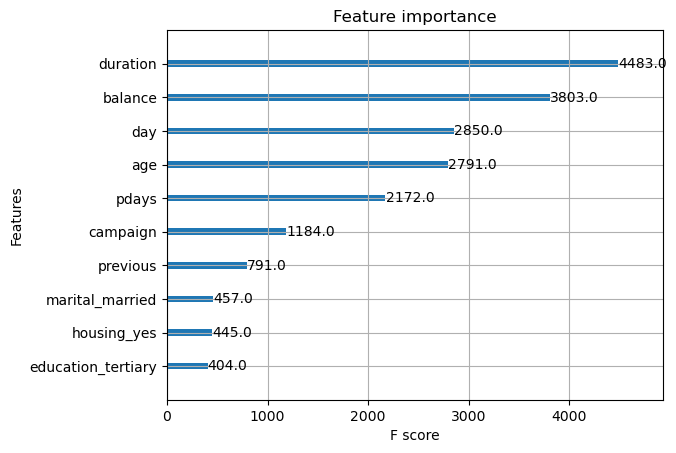

In [47]:
xgb.plot_importance(model3, max_num_features = 10)

#### Preparing SHAP

In [48]:
#pip install shap
#conda install -c conda-forge shap
import shap
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_test)

#### shap plotting

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


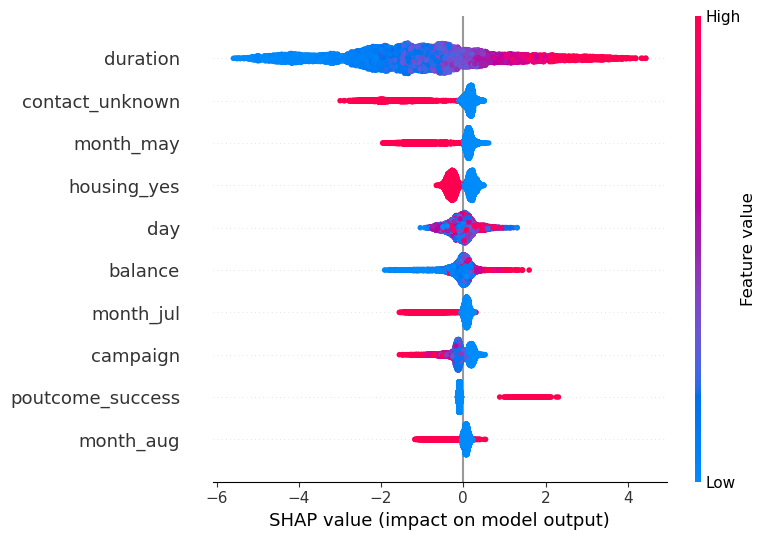

In [49]:
shap.summary_plot(shap_values,
                  X_test,
                  feature_names = feature_columns,
                  max_display = 10)